<a href="https://colab.research.google.com/github/prateeknigam9/Meme-classifier/blob/main/Text_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text based Models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Case_study2/data'

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Bidirectional
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

In [ ]:
data = pd.read_csv('data.csv')
data.head()

In [ ]:
#text based features
data = data[['clean_sent','title','Dank_or_not']]
data.head()

In [ ]:
data['title'] = data['title'].apply(lambda x:x.lower())

In [ ]:
sns.countplot(x="Dank_or_not", data=data)
plt.title("Target distribution")

Baseline Model
LSTM
BERT

In [ ]:
X = data[['clean_sent','title']]
y = data['Dank_or_not']

In [ ]:
#splitting the data in train, cross_validation and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

Text(0.5, 1.0, 'Y_test Distribution')

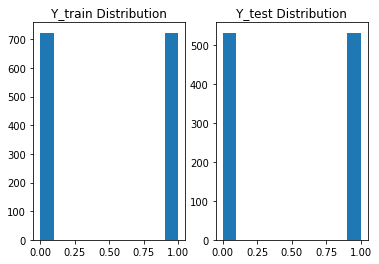

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_train)
ax1.set_title('Y_train Distribution')
ax2.hist(y_test)
ax2.set_title('Y_test Distribution')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_sent'])

In [ ]:
dict(list(tokenizer.word_index.items())[0: 10])

{'a': 3,
 'and': 5,
 'in': 6,
 'is': 9,
 'of': 8,
 's': 10,
 'the': 1,
 'to': 4,
 'when': 7,
 'you': 2}

In [ ]:
lenth = X_train['clean_sent'].apply(lambda x:len(x))
print(np.mean(lenth))
del lenth

105.25069252077563


In [ ]:
train_sequence = tokenizer.texts_to_sequences(X_train['clean_sent'])
cv_sequence = tokenizer.texts_to_sequences(X_cv['clean_sent'])

In [ ]:
padded_train = pad_sequences(train_sequence,maxlen=25,padding='post')
padded_cv = pad_sequences(cv_sequence,maxlen=25,padding='post')

In [ ]:
train_sequence[0]

[1491, 2478, 355, 824, 2479, 40, 11, 501, 14, 119, 283, 2480]

In [ ]:
padded_train[0]

array([1491, 2478,  355,  824, 2479,   40,   11,  501,   14,  119,  283,
       2480,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

### BaseLine Model

In [ ]:
def threshold_func(true,pred):
  FPR,TPR,th = roc_curve(true,pred)
  return th
def threshold(true,pred):
    return tf.py_function(threshold_func,(true,pred),tf.double)

In [ ]:
tf.keras.backend.clear_session()
input = Input(shape=(25,))
dense_layer = Dense(64,activation='relu')(input)
dense_layer = Dense(32,activation='relu')(dense_layer)
dense_layer = Dense(16,activation='relu')(dense_layer)
dense_layer = Dense(8,activation='relu')(dense_layer)
output = Dense(1,activation='sigmoid')(dense_layer)

model = Model(input,output)
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC(),threshold])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
___________________________________________________________

In [ ]:
history = model.fit(padded_train,y_train,validation_data=(padded_cv,y_cv),epochs=30,verbose=2)

Epoch 1/30
46/46 - 1s - loss: 106.5801 - accuracy: 0.5038 - auc: 0.5160 - threshold: 0.4442 - val_loss: 12.7418 - val_accuracy: 0.4860 - val_auc: 0.5263 - val_threshold: 0.3777
Epoch 2/30
46/46 - 0s - loss: 5.7925 - accuracy: 0.5204 - auc: 0.5269 - threshold: 0.5030 - val_loss: 2.4578 - val_accuracy: 0.4888 - val_auc: 0.4845 - val_threshold: 0.7048
Epoch 3/30
46/46 - 0s - loss: 1.6056 - accuracy: 0.5266 - auc: 0.5338 - threshold: 0.7384 - val_loss: 1.5971 - val_accuracy: 0.5000 - val_auc: 0.5027 - val_threshold: 0.7603
Epoch 4/30
46/46 - 0s - loss: 0.9702 - accuracy: 0.5211 - auc: 0.5115 - threshold: 0.7746 - val_loss: 1.2753 - val_accuracy: 0.5084 - val_auc: 0.5131 - val_threshold: 0.7118
Epoch 5/30
46/46 - 0s - loss: 0.8198 - accuracy: 0.5135 - auc: 0.5230 - threshold: 0.7325 - val_loss: 1.0748 - val_accuracy: 0.5028 - val_auc: 0.5108 - val_threshold: 0.8035
Epoch 6/30
46/46 - 0s - loss: 0.7313 - accuracy: 0.5142 - auc: 0.5271 - threshold: 0.8427 - val_loss: 1.0130 - val_accuracy: 0.

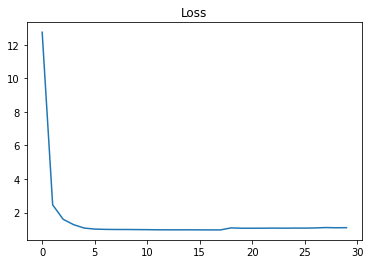

In [ ]:
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.show()

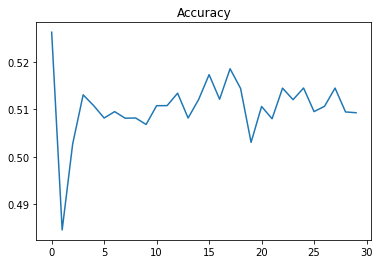

In [ ]:
plt.plot(history.history['val_auc'])
plt.title("Accuracy")
plt.show()

In [ ]:
def predict(test,model,th):
    tokenizer.fit_on_texts(test)
    test_sequence = tokenizer.texts_to_sequences(test)
    padded_test = pad_sequences(test_sequence,maxlen=25,padding='post') 
    pred = model.predict(padded_test)
    predicted=[]
    for i in pred:
       if i > th:
          predicted.append(1)
       else:
          predicted.append(0)

    return predicted

In [ ]:
def metrics(true,pred):
    result={}
    cf = confusion_matrix(true,pred)
    sns.heatmap(cf)
    plt.show()

    acc = accuracy_score(true,pred)
    print("#####################")
    print("accuracy:",acc)
    print("#####################")

    auc_score = roc_auc_score(true,pred)
    print("#####################")
    print("auc_score:",auc_score)
    print("#####################")
    
    CR = classification_report(true,pred)
    print("#####################")
    print("classsifciation Report",CR)
    print("#####################")

    result['accuracy'] = acc
    result['roc_auc_score'] = auc_score
    result['classification_report'] = CR

    return result

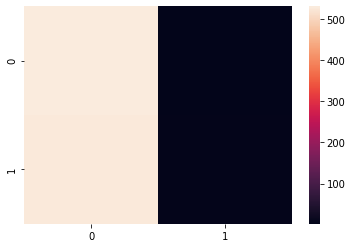

#####################
accuracy: 0.5032863849765258
#####################
#####################
auc_score: 0.5028230755124208
#####################
#####################
classsifciation Report               precision    recall  f1-score   support

           0       0.50      1.00      0.67       533
           1       0.71      0.01      0.02       532

    accuracy                           0.50      1065
   macro avg       0.61      0.50      0.34      1065
weighted avg       0.61      0.50      0.34      1065

#####################


In [ ]:
pred = predict(X_test['clean_sent'],model,th = 0.7206)
result = metrics(y_test,pred)

Although, there we see the lost decreasing and the auc score as increasing, but the performance of the model is not good, thus we can move forward with advance long term memory models.

### LSTM Model

In [ ]:
vocab_size = len(tokenizer.index_word)

In [ ]:
tf.keras.backend.clear_session()
inputs = Input(name='inputs',shape=(25,))
layer = Embedding(input_dim=vocab_size+1,output_dim=64,mask_zero=True)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,activation='relu')(layer)
layer = Dense(64,activation='relu')(layer)
output = Dense(1,activation='sigmoid')(layer)

model_lstm = Model(inputs=inputs,outputs=output)

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='binary_crossentropy',
                   metrics=['accuracy',tf.keras.metrics.AUC(),threshold])
model_lstm.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 25)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 25, 64)            754496    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 820,673
Trainable params: 820,673
Non-trainable params: 0
_______________________________________________________

In [ ]:
history = model_lstm.fit(padded_train,y_train,validation_data=(padded_cv,y_cv),epochs=30,verbose=2)

Epoch 1/30
46/46 - 7s - loss: 0.6928 - accuracy: 0.5197 - auc: 0.5193 - threshold: 0.5499 - val_loss: 0.6907 - val_accuracy: 0.5532 - val_auc: 0.5572 - val_threshold: 0.5486
Epoch 2/30
46/46 - 2s - loss: 0.5744 - accuracy: 0.7657 - auc: 0.8102 - threshold: 0.5796 - val_loss: 0.8234 - val_accuracy: 0.5448 - val_auc: 0.5335 - val_threshold: 0.5593
Epoch 3/30
46/46 - 2s - loss: 0.1723 - accuracy: 0.9454 - auc: 0.9810 - threshold: 0.8025 - val_loss: 1.2126 - val_accuracy: 0.5266 - val_auc: 0.5231 - val_threshold: 0.6123
Epoch 4/30
46/46 - 2s - loss: 0.0858 - accuracy: 0.9737 - auc: 0.9940 - threshold: 0.8872 - val_loss: 1.5794 - val_accuracy: 0.5210 - val_auc: 0.5110 - val_threshold: 0.5335
Epoch 5/30
46/46 - 2s - loss: 0.0565 - accuracy: 0.9834 - auc: 0.9969 - threshold: 0.9137 - val_loss: 1.5937 - val_accuracy: 0.5224 - val_auc: 0.5060 - val_threshold: 0.5723
Epoch 6/30
46/46 - 2s - loss: 0.0554 - accuracy: 0.9820 - auc: 0.9969 - threshold: 0.9353 - val_loss: 1.5962 - val_accuracy: 0.532

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Epoch 27/30
46/46 - 2s - loss: 0.0351 - accuracy: 0.9841 - auc: 0.9983 - threshold: 0.9619 - val_loss: 3.2031 - val_accuracy: 0.5168 - val_auc: 0.5055 - val_threshold: 0.5221
Epoch 28/30
46/46 - 2s - loss: 0.0358 - accuracy: 0.9848 - auc: 0.9984 - threshold: 0.9691 - val_loss: 3.2258 - val_accuracy: 0.5210 - val_auc: 0.5063 - val_threshold: 0.5188
Epoch 29/30
46/46 - 2s - loss: 0.0345 - accuracy: 0.9848 - auc: 0.9984 - threshold: 0.9590 - val_loss: 3.2563 - val_accuracy: 0.5224 - val_auc: 0.5055 - val_threshold: 0.5283
Epoch 30/30
46/46 - 2s - loss: 0.0349 - accuracy: 0.9848 - auc: 0.9986 - threshold: 0.9688 - val_loss: 3.2962 - val_accuracy: 0.5210 - val_auc: 0.5061 - val_threshold: 0.5257


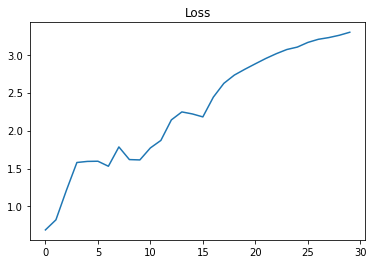

In [ ]:
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.show()

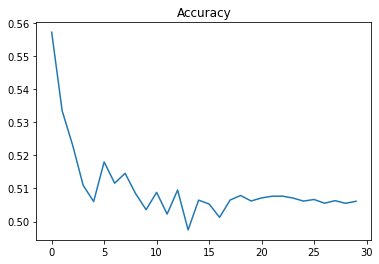

In [ ]:
plt.plot(history.history['val_auc'])
plt.title("Accuracy")
plt.show()

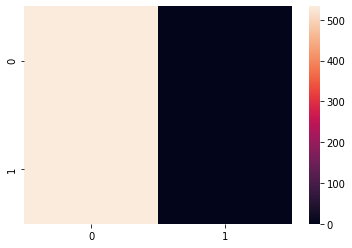

#####################
accuracy: 0.5004694835680751
#####################
#####################
auc_score: 0.5
#####################
#####################
classsifciation Report               precision    recall  f1-score   support

           0       0.50      1.00      0.67       533
           1       0.00      0.00      0.00       532

    accuracy                           0.50      1065
   macro avg       0.25      0.50      0.33      1065
weighted avg       0.25      0.50      0.33      1065

#####################


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = predict(X_test['clean_sent'],model_lstm,th = 0.5257)
result = metrics(y_test,pred)

### LSTM Bidirectional Model

In [ ]:
tf.keras.backend.clear_session()
inputs = Input(name='inputs',shape=(25,))
layer = Embedding(input_dim=vocab_size+1,output_dim=64,mask_zero=True)(inputs)
layer = Bidirectional(LSTM(64))(layer)
layer = Dense(256,activation='relu')(layer)
layer = Dense(64,activation='relu')(layer)
output = Dense(1,activation='sigmoid')(layer)

model_bidir = Model(inputs=inputs,outputs=output)

model_bidir.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='binary_crossentropy',
                   metrics=['accuracy',tf.keras.metrics.AUC(),threshold])
model_bidir.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 25)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 25, 64)            754496    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 870,081
Trainable params: 870,081
Non-trainable params: 0
_______________________________________________________

In [ ]:
history = model_bidir.fit(padded_train,y_train,validation_data=(padded_cv,y_cv),epochs=30,verbose=2)

Epoch 1/30
46/46 - 11s - loss: 0.6944 - accuracy: 0.5162 - auc: 0.5269 - threshold: 0.5337 - val_loss: 0.6928 - val_accuracy: 0.5070 - val_auc: 0.5349 - val_threshold: 0.5616
Epoch 2/30
46/46 - 3s - loss: 0.6225 - accuracy: 0.7070 - auc: 0.7791 - threshold: 0.5776 - val_loss: 0.7500 - val_accuracy: 0.5476 - val_auc: 0.5670 - val_threshold: 0.5621
Epoch 3/30
46/46 - 3s - loss: 0.2530 - accuracy: 0.9122 - auc: 0.9614 - threshold: 0.7199 - val_loss: 1.0750 - val_accuracy: 0.5602 - val_auc: 0.5664 - val_threshold: 0.4828
Epoch 4/30
46/46 - 3s - loss: 0.0934 - accuracy: 0.9710 - auc: 0.9930 - threshold: 0.8966 - val_loss: 1.2590 - val_accuracy: 0.5560 - val_auc: 0.5588 - val_threshold: 0.5526
Epoch 5/30
46/46 - 3s - loss: 0.0658 - accuracy: 0.9793 - auc: 0.9960 - threshold: 0.9260 - val_loss: 1.4282 - val_accuracy: 0.5378 - val_auc: 0.5413 - val_threshold: 0.6113
Epoch 6/30
46/46 - 3s - loss: 0.0578 - accuracy: 0.9813 - auc: 0.9969 - threshold: 0.9316 - val_loss: 1.5303 - val_accuracy: 0.53

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


46/46 - 3s - loss: 0.0351 - accuracy: 0.9848 - auc: 0.9985 - threshold: 0.9594 - val_loss: 2.8032 - val_accuracy: 0.5504 - val_auc: 0.5401 - val_threshold: 0.5411
Epoch 18/30
46/46 - 3s - loss: 0.0344 - accuracy: 0.9841 - auc: 0.9986 - threshold: 0.9619 - val_loss: 2.8270 - val_accuracy: 0.5504 - val_auc: 0.5411 - val_threshold: 0.5240
Epoch 19/30
46/46 - 3s - loss: 0.0346 - accuracy: 0.9834 - auc: 0.9984 - threshold: 0.9619 - val_loss: 2.9323 - val_accuracy: 0.5546 - val_auc: 0.5412 - val_threshold: 0.5413
Epoch 20/30
46/46 - 3s - loss: 0.0345 - accuracy: 0.9848 - auc: 0.9983 - threshold: 0.9634 - val_loss: 2.9871 - val_accuracy: 0.5546 - val_auc: 0.5411 - val_threshold: 0.5419
Epoch 21/30
46/46 - 3s - loss: 0.0344 - accuracy: 0.9834 - auc: 0.9983 - threshold: 0.9603 - val_loss: 3.0335 - val_accuracy: 0.5546 - val_auc: 0.5411 - val_threshold: 0.5453
Epoch 22/30
46/46 - 3s - loss: 0.0347 - accuracy: 0.9848 - auc: 0.9984 - threshold: 0.9574 - val_loss: 3.0783 - val_accuracy: 0.5518 - va

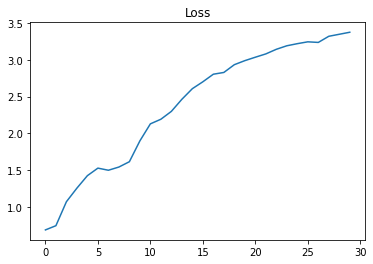

In [ ]:
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.show()

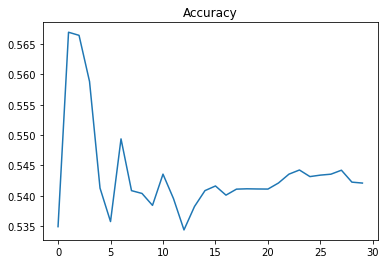

In [ ]:
plt.plot(history.history['val_auc'])
plt.title("Accuracy")
plt.show()

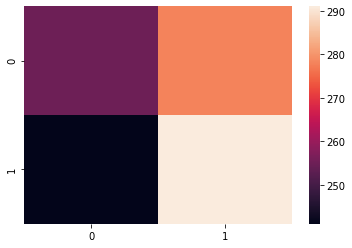

#####################
accuracy: 0.5126760563380282
#####################
#####################
auc_score: 0.5127082481061942
#####################
#####################
classsifciation Report               precision    recall  f1-score   support

           0       0.51      0.48      0.50       533
           1       0.51      0.55      0.53       532

    accuracy                           0.51      1065
   macro avg       0.51      0.51      0.51      1065
weighted avg       0.51      0.51      0.51      1065

#####################


In [ ]:
pred = predict(X_test['clean_sent'],model_bidir,th = 0.5257)
result = metrics(y_test,pred)

### BERT - Distilbert

In [ ]:
# !pip install ktrain
import ktrain
from ktrain import text

In [ ]:
model_name = 'distilbert-base-uncased'

transformer = text.Transformer(model_name,maxlen=25,class_names=[0,1])

In [ ]:
train_data = transformer.preprocess_train(np.array(X_train['clean_sent']),np.array(y_train))
validation_data = transformer.preprocess_test(np.array(X_cv['clean_sent']),np.array(y_cv))

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 50
	99percentile : 105


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 54
	99percentile : 110


In [ ]:
model = transformer.get_classifier()

In [ ]:
learner = ktrain.get_learner(model,train_data=train_data,val_data=validation_data)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
45/45 [==============================] - 12s 68ms/step - loss: 0.7005 - accuracy: 0.4951
Epoch 2/5
45/45 [==============================] - 3s 73ms/step - loss: 0.6914 - accuracy: 0.5353
Epoch 3/5
45/45 [==============================] - 3s 72ms/step - loss: 0.6862 - accuracy: 0.5547
Epoch 4/5
45/45 [==============================] - 3s 68ms/step - loss: 4.5352 - accuracy: 0.5110


done.
Visually inspect loss plot and select learning rate associated with falling loss


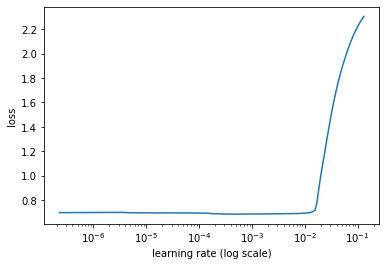

In [ ]:
learner.lr_find(show_plot=True,max_epochs=5)

In [ ]:
learner.fit(learner.lr_estimate()[0],10)

Epoch 1/10
46/46 [==============================] - 12s 110ms/step - loss: 0.6942 - accuracy: 0.5246 - val_loss: 0.6830 - val_accuracy: 0.5602
Epoch 2/10
46/46 [==============================] - 4s 81ms/step - loss: 0.6623 - accuracy: 0.6231 - val_loss: 0.6817 - val_accuracy: 0.5994
Epoch 3/10
46/46 [==============================] - 4s 81ms/step - loss: 0.6111 - accuracy: 0.6718 - val_loss: 0.7149 - val_accuracy: 0.5322
Epoch 4/10
46/46 [==============================] - 4s 81ms/step - loss: 0.5518 - accuracy: 0.7204 - val_loss: 0.7394 - val_accuracy: 0.5742
Epoch 5/10
46/46 [==============================] - 4s 81ms/step - loss: 0.4177 - accuracy: 0.8390 - val_loss: 0.8867 - val_accuracy: 0.5560
Epoch 6/10
46/46 [==============================] - 4s 81ms/step - loss: 0.2818 - accuracy: 0.8977 - val_loss: 1.0414 - val_accuracy: 0.5448
Epoch 7/10
46/46 [==============================] - 4s 81ms/step - loss: 0.1680 - accuracy: 0.9547 - val_loss: 1.1804 - val_accuracy: 0.5280
Epoch 8/10


In [ ]:
learner.validate()

              precision    recall  f1-score   support

           0       0.55      0.54      0.55       357
           1       0.55      0.56      0.56       357

    accuracy                           0.55       714
   macro avg       0.55      0.55      0.55       714
weighted avg       0.55      0.55      0.55       714



array([[193, 164],
       [156, 201]])

In [ ]:
learner.view_top_losses(n=5,preproc=transformer)

----------
id:487 | loss:5.82 | true:1 | pred:0)

----------
id:467 | loss:5.79 | true:1 | pred:0)

----------
id:265 | loss:5.77 | true:1 | pred:0)

----------
id:335 | loss:5.73 | true:1 | pred:0)

----------
id:337 | loss:5.71 | true:1 | pred:0)



In [ ]:
X_cv.iloc[487]['clean_sent']

'me other   don t have a girlfriend iol girl'

In [ ]:
predictor = ktrain.get_predictor(learner.model,preproc=transformer)

In [ ]:
pred=[]
for sent in X_test['clean_sent']:
  pred.append(predictor.predict(sent))

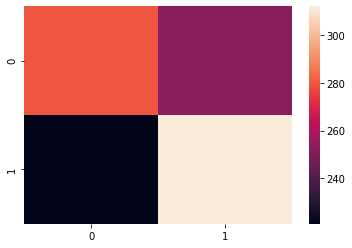

#####################
accuracy: 0.5558685446009389
#####################
#####################
auc_score: 0.5558408215661105
#####################
#####################
classsifciation Report               precision    recall  f1-score   support

           0       0.56      0.53      0.54       532
           1       0.55      0.59      0.57       533

    accuracy                           0.56      1065
   macro avg       0.56      0.56      0.56      1065
weighted avg       0.56      0.56      0.56      1065

#####################


In [ ]:
result = metrics(y_test,pred)

## Summary

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

In [ ]:
x.field_names = ["Model", "Accuracy", "AUC"]
x.add_row(["Base Simple NN", 0.503, 0.502])
x.add_row(["LSTM", 0.500, 0.5])
x.add_row(["LSTM Bidirectional",0.512,0.512])
x.add_row(["Bert - Distilbert",0.555,0.555])

In [ ]:
print(x)

+--------------------+----------+-------+
|       Model        | Accuracy |  AUC  |
+--------------------+----------+-------+
|   Base Simple NN   |  0.503   | 0.502 |
|        LSTM        |   0.5    |  0.5  |
| LSTM Bidirectional |  0.512   | 0.512 |
| Bert - Distilbert  |  0.555   | 0.555 |
+--------------------+----------+-------+
